In [64]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pickle
import csv
import numpy as np
from scipy.misc import imread
import shutil
import matplotlib.pyplot as plt

import h5py
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K

from utilities import *
from Keras import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
prepare_environment(num_classes=7)

old directory removed data/model_train
old directory removed data/model_valid
copy 34 images for whale # 1, called w_1287fbc
copy 27 images for whale # 2, called w_98baff9
copy 26 images for whale # 3, called w_7554f44
copy 23 images for whale # 4, called w_1eafe46
copy 22 images for whale # 5, called w_693c9ee
copy 22 images for whale # 6, called w_ab4cae2
copy 22 images for whale # 7, called w_fd1cb9d
176  images of  7  whales copied in total
Target Directory train:  data/model_train  validation:  data/model_valid
137  images copied as training data
39  images copied as validation data
write csv file with training data: data/model_train.csv
write csv file with validation data: data/model_valid.csv


In [57]:
print_data_info()

Found 137 images belonging to 7 classes.
Found 39 images belonging to 7 classes.
whale_class_map:
{'w_7554f44': 3, 'w_fd1cb9d': 6, 'w_98baff9': 4, 'w_ab4cae2': 5, 'w_693c9ee': 2, 'w_1eafe46': 1, 'w_1287fbc': 0}
class_whale_map:
{0: 'w_1287fbc', 1: 'w_1eafe46', 2: 'w_693c9ee', 3: 'w_7554f44', 4: 'w_98baff9', 5: 'w_ab4cae2', 6: 'w_fd1cb9d'}


In [63]:
model = create_pretrained_model()

In [65]:
histories = train_and_save(model, epochs=1, cnn_epochs=1)

old directory removed data/model_train
old directory removed data/model_valid
copy 34 images for whale # 1, called w_1287fbc
copy 27 images for whale # 2, called w_98baff9
copy 26 images for whale # 3, called w_7554f44
copy 23 images for whale # 4, called w_1eafe46
copy 22 images for whale # 5, called w_693c9ee
copy 22 images for whale # 6, called w_ab4cae2
copy 22 images for whale # 7, called w_fd1cb9d
176  images of  7  whales copied in total
Target Directory train:  data/model_train  validation:  data/model_valid
137  images copied as training data
39  images copied as validation data
write csv file with training data: data/model_train.csv
write csv file with validation data: data/model_valid.csv
Found 137 images belonging to 7 classes.
Found 39 images belonging to 7 classes.
Epoch 1/1
 - 135s - loss: 12.7834 - acc: 0.1081 - val_loss: 13.6384 - val_acc: 0.1538
unfrozen 2 top CNN layers
Epoch 1/1
 - 157s - loss: 13.4887 - val_loss: 13.6384


In [47]:
two_layers = True
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# fully-connected layer on top
x = Dense(1024, activation='relu')(x)
if two_layers:
    # new added as https://towardsdatascience.com/transfer-learning-using-keras-d804b2e04ef8
    x = Dropout(0.5)(x)
    x = Dense(1024, activation="relu")(x)
# logistic layer
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
# metrics='accuracy' causes the model to store and report accuracy (train and validate)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)


0 input_4
1 conv2d_283
2 batch_normalization_283
3 activation_283
4 conv2d_284
5 batch_normalization_284
6 activation_284
7 conv2d_285
8 batch_normalization_285
9 activation_285
10 max_pooling2d_13
11 conv2d_286
12 batch_normalization_286
13 activation_286
14 conv2d_287
15 batch_normalization_287
16 activation_287
17 max_pooling2d_14
18 conv2d_291
19 batch_normalization_291
20 activation_291
21 conv2d_289
22 conv2d_292
23 batch_normalization_289
24 batch_normalization_292
25 activation_289
26 activation_292
27 average_pooling2d_28
28 conv2d_288
29 conv2d_290
30 conv2d_293
31 conv2d_294
32 batch_normalization_288
33 batch_normalization_290
34 batch_normalization_293
35 batch_normalization_294
36 activation_288
37 activation_290
38 activation_293
39 activation_294
40 mixed0
41 conv2d_298
42 batch_normalization_298
43 activation_298
44 conv2d_296
45 conv2d_299
46 batch_normalization_296
47 batch_normalization_299
48 activation_296
49 activation_299
50 average_pooling2d_29
51 conv2d_295
52

In [51]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

In [52]:
histories = train_and_save(model, epochs=1, cnn_epochs=1)

old directory removed data/model_train
old directory removed data/model_valid
copy 34 images for whale # 1, called w_1287fbc
copy 27 images for whale # 2, called w_98baff9
copy 26 images for whale # 3, called w_7554f44
copy 23 images for whale # 4, called w_1eafe46
copy 22 images for whale # 5, called w_693c9ee
copy 22 images for whale # 6, called w_ab4cae2
copy 22 images for whale # 7, called w_fd1cb9d
176  images of  7  whales copied in total
Target Directory train:  data/model_train  validation:  data/model_valid
137  images copied as training data
39  images copied as validation data
write csv file with training data: data/model_train.csv
write csv file with validation data: data/model_valid.csv
Found 137 images belonging to 7 classes.
Found 39 images belonging to 7 classes.
Epoch 1/1
 - 155s - loss: 2.0515 - val_loss: 1.9929


In [17]:
print(histories)

[{'loss': [8.7449762486229261], 'val_loss': [11.758036809089857], 'acc': [0.17355371913141457], 'val_acc': [0.12820512935137138]}]


In [18]:
run_name = "run-{}".format(datetime.datetime.now().strftime("%Y-%m-%d-%H%M%S"))

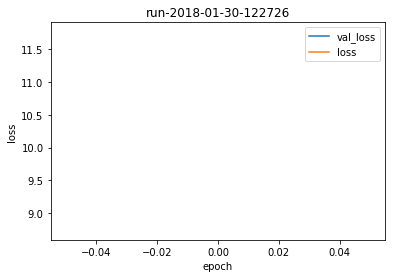

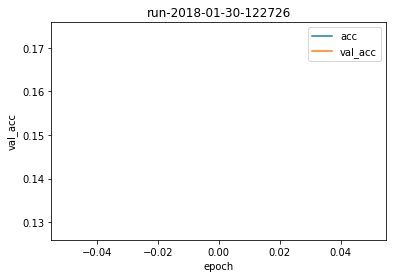

In [19]:
save_learning_curves(histories[0], run_name)

In [20]:
write_csv_dict(histories[0], keys=['loss', 'acc', 'val_loss', 'val_acc'], filename=run_name + '.csv')

In [21]:
# try to verify on test data --> no success so far

# use all training data of the first num_classes (7) whales as test data.
# no good practice, but all training data have been augmented, so at least some indication
# about predictive power of model
test_dir = "data/model_test"
test_csv = "data/model_test.csv"
num_train_imgs, num_valid_imgs = create_small_case(
    sel_whales = np.arange(1,7+1),  # whales to be considered
    all_train_dir = all_train_dir,
    all_train_csv = all_train_csv,
    train_dir = test_dir,
    train_csv = test_csv,
    valid_dir = None,     # no validation, copy all data into test_dir "data/model_test"
    valid_csv = None,
    train_valid = 1.,
    sub_dirs = True) 

# for test Purposes !!!

# valid_gen = image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    rescale = 1./255,
    # preprocessing_function=preprocess_input,   # model specific function
    fill_mode = "nearest")

test_flow = test_gen.flow_from_directory(
    test_dir,
    # color_mode = "grayscale",
    batch_size = batch_size,     
    target_size = (299,299),
    class_mode = "categorical")    # use "None" ??

old directory removed data/model_test
copy 34 images for whale # 1, called w_1287fbc
copy 27 images for whale # 2, called w_98baff9
copy 26 images for whale # 3, called w_7554f44
copy 23 images for whale # 4, called w_1eafe46
copy 22 images for whale # 5, called w_693c9ee
copy 22 images for whale # 6, called w_ab4cae2
copy 22 images for whale # 7, called w_fd1cb9d
176  images of  7  whales copied in total
Target Directory train:  data/model_test  validation:  None
176  images copied as training data
0  images copied as validation data
write csv file with training data: data/model_test.csv
Found 176 images belonging to 7 classes.


In [22]:
preds = model.predict_generator(test_flow, verbose = 1)

11/11 [==============================] - 199s 18s/step


In [45]:
whale_class_map = (test_flow.class_indices)           # get dict mapping whalenames --> class_no
class_whale_map = make_label_dict(directory=test_dir) # get dict mapping class_no --> whalenames
print("whale_class_map:")
print(whale_class_map)
print("class_whale_map:")
print(class_whale_map)
print("preds.shape:")
print(preds.shape)
print("preds[:10]")
print(preds[:10])

# get list of model predictions: one ordered list of maxpred whalenames per image
top_k = preds.argsort()[:, -max_preds:][:, ::-1]
model_preds = [([class_whale_map[i] for i in line]) for line in top_k]  

# get list of true labels: one whalename per image
test_list = read_csv(file_name = test_csv)    # list with (filename, whalename)
true_labels = []
for fn in test_flow.filenames:
    offset, filename = fn.split('/')
    whale = [line[1] for line in test_list if line[0]==filename][0]
    true_labels.append(whale)

print("model predictions: \n", np.array(model_preds)[0:10])
print("true labels \n", np.array(true_labels)[0:10])

# compute accuracy by hand - List of True Predictions 
TP_List = [(1 if model_preds[i][0]==true_labels[i] else 0) for i in range(len(true_labels))]
acc = np.sum(TP_List)/len(TP_List)
print("{} true predictions out of {}: accurracy: {:0.4f} ".format(np.sum(TP_List),len(TP_List),acc))

MAP = mean_average_precision(model_preds, true_labels, max_preds)
print("MAP", MAP)

# run Dummy MAP generator 5 times and get average for more reliable result
avg_dummy_map = np.mean([Dummy_MAP(probs = 'weighted', distributed_as = train_csv, image_no = len(TP_List)) for i in range(5)])
print("Dummy MAP averaged {:0.4f}".format(avg_dummy_map))

# MAP only slightly higher than averag dummy MAP

whale_class_map:
{'w_7554f44': 3, 'w_fd1cb9d': 6, 'w_98baff9': 4, 'w_ab4cae2': 5, 'w_693c9ee': 2, 'w_1eafe46': 1, 'w_1287fbc': 0}
class_whale_map:
{0: 'w_1287fbc', 1: 'w_1eafe46', 2: 'w_693c9ee', 3: 'w_7554f44', 4: 'w_98baff9', 5: 'w_ab4cae2', 6: 'w_fd1cb9d'}
preds.shape:
(176, 7)
preds[:10]
[[  4.15698326e-17   5.37059903e-01   1.47203204e-11   9.10298052e-12
    4.62940127e-01   6.88846021e-14   5.20517223e-13]
 [  1.39071478e-17   5.52621305e-01   7.50012032e-12   4.14585597e-12
    4.47378725e-01   2.65379573e-14   2.25911480e-13]
 [  7.05168042e-12   5.57020426e-01   3.60054067e-08   1.80758786e-08
    4.42979544e-01   8.96583530e-10   3.68721698e-09]
 [  1.06108460e-12   5.58171093e-01   8.75452066e-09   4.85269291e-09
    4.41828936e-01   2.11922341e-10   6.63735955e-10]
 [  1.00001886e-12   5.12859643e-01   9.93488491e-09   6.74927225e-09
    4.87140417e-01   2.19560550e-10   6.82743306e-10]
 [  1.60271752e-13   6.33110404e-01   2.40786968e-09   1.12872867e-09
    3.66889656e-0

In [ ]:
print_model_test_info(model)

In [2]:
# global variables
all_train_dir = "data/train"     # directory with original kaggle training data
all_train_csv = "data/train.csv" # original kaggle train.csv file
train_dir = "data/model_train"
train_csv = "data/model_train.csv"
valid_dir = "data/model_valid"
valid_csv = "data/model_valid.csv"

num_classes = 7     # number of whales to be considered (in order of occuurence)
max_preds = 5       # number of ranked predictions (default 5)
batch_size = 16     # used for training as well as validation
train_valid = 0.7   # ratio training / validation data

# create training environment for training data
num_train_imgs, num_valid_imgs = create_small_case(
       sel_whales = np.arange(1,num_classes+1),  # whales to be considered
       all_train_dir = all_train_dir,
       all_train_csv = all_train_csv,
       train_dir = train_dir,
       train_csv = train_csv,
       valid_dir = valid_dir,
       valid_csv = valid_csv,
       train_valid = train_valid,
       sub_dirs = True) 

old directory removed data/model_train
old directory removed data/model_valid
copy 34 images for whale # 1, called w_1287fbc
copy 27 images for whale # 2, called w_98baff9
copy 26 images for whale # 3, called w_7554f44
copy 23 images for whale # 4, called w_1eafe46
copy 22 images for whale # 5, called w_693c9ee
copy 22 images for whale # 6, called w_ab4cae2
copy 22 images for whale # 7, called w_fd1cb9d
176  images of  7  whales copied in total
Target Directory train:  data/model_train  validation:  data/model_valid
120  images copied as training data
56  images copied as validation data
write csv file with training data: data/model_train.csv
write csv file with validation data: data/model_valid.csv


In [3]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)                     # new added as https://towardsdatascience.com/transfer-learning-using-keras-d804b2e04ef8
x = Dense(1024, activation="relu")(x)
# and a logistic layer
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
# metrics='accuracy' causes the model to store and report accuracy (train and validate)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# define image generator
train_gen = image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    rescale = 1./255,   # redundant with featurewise_center ? 
    # preprocessing_function=preprocess_input, not used in most examples
    # horizontal_flip = True,    # no, as individual shapes are looked for
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30)

train_flow = train_gen.flow_from_directory(
    train_dir,
    # save_to_dir = "data/model_train/augmented",    
    # color_mode = "grayscale",
    target_size = (299,299),
    batch_size = batch_size, 
    class_mode = "categorical")

valid_gen = image.ImageDataGenerator(
    rescale = 1./255,
    fill_mode = "nearest")

valid_flow = valid_gen.flow_from_directory(
    valid_dir,
    target_size = (299,299),
    batch_size = batch_size,        
    class_mode = "categorical")

whale_class_map = (train_flow.class_indices)           # get dict mapping whalenames --> class_no
class_whale_map = make_label_dict(directory=train_dir) # get dict mapping class_no --> whalenames
print(whale_class_map)
print(class_whale_map)

Found 120 images belonging to 7 classes.
Found 56 images belonging to 7 classes.
{'w_fd1cb9d': 6, 'w_ab4cae2': 5, 'w_1287fbc': 0, 'w_7554f44': 3, 'w_98baff9': 4, 'w_1eafe46': 1, 'w_693c9ee': 2}
{0: 'w_1287fbc', 1: 'w_1eafe46', 2: 'w_693c9ee', 3: 'w_7554f44', 4: 'w_98baff9', 5: 'w_ab4cae2', 6: 'w_fd1cb9d'}


In [5]:
# reload model that gets not stuck on training
# from keras.models import load_model
# model = load_model('InceptV3_1_Epochs_7_classes_2nd.h5')

OSError: Unable to open file (unable to open file: name = 'InceptV3_1_Epochs_7_classes_2nd.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
hist = model.fit_generator(
    train_flow, 
    steps_per_epoch = num_train_imgs//batch_size,
    verbose = 2, 
    validation_data = valid_flow,   
    validation_steps = num_valid_imgs//batch_size,
    epochs=50)     

Epoch 1/50
 - 2s - loss: 1.4911 - acc: 0.4483 - val_loss: 1.9023 - val_acc: 0.1667
Epoch 2/50
 - 2s - loss: 1.7744 - acc: 0.3053 - val_loss: 1.9599 - val_acc: 0.1750
Epoch 3/50
 - 2s - loss: 1.6405 - acc: 0.3571 - val_loss: 2.1624 - val_acc: 0.2000
Epoch 4/50
 - 2s - loss: 1.4865 - acc: 0.4032 - val_loss: 1.7803 - val_acc: 0.3750
Epoch 5/50
 - 2s - loss: 1.5338 - acc: 0.4357 - val_loss: 1.8106 - val_acc: 0.2917
Epoch 6/50
 - 2s - loss: 1.3621 - acc: 0.5078 - val_loss: 1.6907 - val_acc: 0.3250
Epoch 7/50
 - 2s - loss: 1.6758 - acc: 0.4561 - val_loss: 2.0843 - val_acc: 0.1500
Epoch 8/50
 - 1s - loss: 1.4857 - acc: 0.4651 - val_loss: 1.7196 - val_acc: 0.4250
Epoch 9/50
 - 2s - loss: 1.5109 - acc: 0.3996 - val_loss: 1.9170 - val_acc: 0.3542
Epoch 10/50
 - 2s - loss: 1.3692 - acc: 0.5168 - val_loss: 1.7789 - val_acc: 0.2250
Epoch 11/50
 - 2s - loss: 1.3271 - acc: 0.5024 - val_loss: 1.9283 - val_acc: 0.3750
Epoch 12/50
 - 2s - loss: 1.1274 - acc: 0.5697 - val_loss: 1.6438 - val_acc: 0.3000
E

In [13]:
# train in cross validation loop
for i in range(20):
    # create new environment with new random train / valid split
    num_train_imgs, num_valid_imgs = create_small_case(
       sel_whales = np.arange(1,num_classes+1),  # whales to be considered
       all_train_dir = all_train_dir,
       all_train_csv = all_train_csv,
       train_dir = train_dir,
       train_csv = train_csv,
       valid_dir = valid_dir,
       valid_csv = valid_csv,
       train_valid = 0.7,
       sub_dirs = True) 

    # here change hyperparameters.........
    
    # define image generator
    train_gen = image.ImageDataGenerator(
        # featurewise_center=True,
        # featurewise_std_normalization=True,
        rescale = 1./255,   # redundant with featurewise_center ? 
        # preprocessing_function=preprocess_input, not used in most examples
        # horizontal_flip = True,    # no, as individual shapes are looked for
        fill_mode = "nearest",
        zoom_range = 0.3,
        width_shift_range = 0.3,
        height_shift_range=0.3,
        rotation_range=30)

    train_flow = train_gen.flow_from_directory(
        train_dir,
        # save_to_dir = "data/model_train/augmented",    
        # color_mode = "grayscale",
        target_size = (299,299),
        batch_size = batch_size, 
        class_mode = "categorical")

    valid_gen = image.ImageDataGenerator(
        rescale = 1./255,
        fill_mode = "nearest")

    valid_flow = valid_gen.flow_from_directory(
        valid_dir,
        target_size = (299,299),
        batch_size = batch_size,         
        class_mode = "categorical") 

    hist = model.fit_generator(
        train_flow, 
        steps_per_epoch = num_train_imgs//batch_size,
        verbose = 2, 
        validation_data = valid_flow,   # to be used later
        validation_steps = num_valid_imgs//batch_size,
        epochs=10)              

model.save('180129_InceptV3_20_Epochs_7_classes_CV_gaga.h5')

# here the model started already from pretrained status (initial loss was ~8.)

old directory removed data/model_train
old directory removed data/model_valid
copy 34 images for whale # 1, called w_1287fbc
copy 27 images for whale # 2, called w_98baff9
copy 26 images for whale # 3, called w_7554f44
copy 23 images for whale # 4, called w_1eafe46
copy 22 images for whale # 5, called w_693c9ee
copy 22 images for whale # 6, called w_ab4cae2
copy 22 images for whale # 7, called w_fd1cb9d
176  images of  7  whales copied in total
Target Directory train:  data/model_train  validation:  data/model_valid
137  images copied as training data
39  images copied as validation data
write csv file with training data: data/model_train.csv
write csv file with validation data: data/model_valid.csv
Found 137 images belonging to 7 classes.
Found 39 images belonging to 7 classes.
Epoch 1/1
 - 143s - loss: 1.9422 - acc: 0.2491 - val_loss: 1.9831 - val_acc: 0.1282
old directory removed data/model_train
old directory removed data/model_valid
copy 34 images for whale # 1, called w_1287fbc
c

Found 39 images belonging to 7 classes.
Epoch 1/1


KeyboardInterrupt: 

In [62]:
# training seems so work - accuracy of ~0.5 on training and validation data

# try to verify on test data --> no success so far

# use all training data of the first num_classes (7) whales a test data.
# no good practice, but all training data have been augmented, so at least some indication
# about predictive power of model
test_dir = "data/model_test"
test_csv = "data/model_test.csv"
num_train_imgs, num_valid_imgs = create_small_case(
       sel_whales = np.arange(1,num_classes+1),  # whales to be considered
       all_train_dir = all_train_dir,
       all_train_csv = all_train_csv,
       train_dir = test_dir,
       train_csv = test_csv,
       valid_dir = None,     # no validation, copy all data into test_dir "data/model_test"
       valid_csv = None,
       train_valid = 1.,
       sub_dirs = True) 

old directory removed data/model_test
copy 34 images for whale # 1, called w_1287fbc
copy 27 images for whale # 2, called w_98baff9
copy 26 images for whale # 3, called w_7554f44
copy 23 images for whale # 4, called w_1eafe46
copy 22 images for whale # 5, called w_693c9ee
copy 22 images for whale # 6, called w_ab4cae2
copy 22 images for whale # 7, called w_fd1cb9d
176  images of  7  whales copied in total
Target Directory train:  data/model_test  validation:  None
176  images copied as training data
0  images copied as validation data
write csv file with training data: data/model_test.csv


In [64]:
# for test Purposes !!!

# valid_gen = image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    rescale = 1./255,
    # preprocessing_function=preprocess_input,   # model specific function
    fill_mode = "nearest")

test_flow = test_gen.flow_from_directory(
    test_dir,
    # color_mode = "grayscale",
    batch_size = batch_size,     
    target_size = (299,299),
    class_mode = "categorical")    # use "None" ??

Found 176 images belonging to 7 classes.


In [65]:
preds = model.predict_generator(test_flow, verbose = 1)

11/11 [==============================] - 191s 17s/step
(176, 7)
[[  4.63210978e-03   3.00654769e-03   2.08380647e-04   3.28651840e-05
    2.13375757e-03   2.42068578e-04   9.89744365e-01]
 [  4.22893502e-02   1.91685081e-01   1.02025822e-01   1.22443028e-02
    2.54318833e-01   3.79027516e-01   1.84090622e-02]
 [  4.87957336e-02   3.56731176e-01   1.06019750e-01   2.23210137e-02
    1.65488258e-01   2.62976795e-01   3.76672558e-02]
 [  1.11918822e-01   3.65958400e-02   1.60670914e-02   8.33930506e-04
    6.80789471e-01   1.00539647e-01   5.32551333e-02]
 [  1.64128207e-02   3.37458588e-02   4.00195569e-02   4.13647760e-03
    7.77367234e-01   1.02771342e-01   2.55466010e-02]
 [  6.20104000e-03   8.65606666e-01   3.90951335e-03   4.19794087e-04
    9.49497707e-03   6.82832021e-03   1.07539691e-01]
 [  1.24325147e-02   1.17013408e-02   1.69343483e-02   9.31790099e-04
    8.58521998e-01   9.30807367e-02   6.39727805e-03]
 [  2.70989574e-02   5.69240987e-01   7.86153376e-02   7.00570410e-0

In [66]:
whale_class_map = (test_flow.class_indices)           # get dict mapping whalenames --> class_no
class_whale_map = make_label_dict(directory=test_dir) # get dict mapping class_no --> whalenames
print(whale_class_map)
print(class_whale_map)

{'w_1eafe46': 1, 'w_7554f44': 3, 'w_fd1cb9d': 6, 'w_ab4cae2': 5, 'w_98baff9': 4, 'w_1287fbc': 0, 'w_693c9ee': 2}
{0: 'w_1287fbc', 1: 'w_1eafe46', 2: 'w_693c9ee', 3: 'w_7554f44', 4: 'w_98baff9', 5: 'w_ab4cae2', 6: 'w_fd1cb9d'}


In [67]:
print(preds.shape)
print(preds[:10])

(176, 7)
[[  4.63210978e-03   3.00654769e-03   2.08380647e-04   3.28651840e-05
    2.13375757e-03   2.42068578e-04   9.89744365e-01]
 [  4.22893502e-02   1.91685081e-01   1.02025822e-01   1.22443028e-02
    2.54318833e-01   3.79027516e-01   1.84090622e-02]
 [  4.87957336e-02   3.56731176e-01   1.06019750e-01   2.23210137e-02
    1.65488258e-01   2.62976795e-01   3.76672558e-02]
 [  1.11918822e-01   3.65958400e-02   1.60670914e-02   8.33930506e-04
    6.80789471e-01   1.00539647e-01   5.32551333e-02]
 [  1.64128207e-02   3.37458588e-02   4.00195569e-02   4.13647760e-03
    7.77367234e-01   1.02771342e-01   2.55466010e-02]
 [  6.20104000e-03   8.65606666e-01   3.90951335e-03   4.19794087e-04
    9.49497707e-03   6.82832021e-03   1.07539691e-01]
 [  1.24325147e-02   1.17013408e-02   1.69343483e-02   9.31790099e-04
    8.58521998e-01   9.30807367e-02   6.39727805e-03]
 [  2.70989574e-02   5.69240987e-01   7.86153376e-02   7.00570410e-03
    1.14280954e-01   1.72118634e-01   3.16394903e-02]

In [69]:
# ge list of model predictions: one ordered list of maxpred whalenames per image
top_k = preds.argsort()[:, -max_preds:][:, ::-1]
# top_k = preds.argsort()[:, -max_preds:]
model_preds = [([class_whale_map[i] for i in line]) for line in top_k]  

# get list of true labels: one whalename per image
# test_list = read_csv(file_name = test_csv)    # list with (filename, whalename)
true_labels = []
for fn in test_flow.filenames:
    offset, filename = fn.split('/')
    whale = [line[1] for line in test_list if line[0]==filename][0]
    true_labels.append(whale)

print("model predictions: \n", np.array(model_preds)[0:20])
print("true labels \n", np.array(true_labels)[0:20])

model predictions: 
 [['w_fd1cb9d' 'w_1287fbc' 'w_1eafe46' 'w_98baff9' 'w_ab4cae2']
 ['w_ab4cae2' 'w_98baff9' 'w_1eafe46' 'w_693c9ee' 'w_1287fbc']
 ['w_1eafe46' 'w_ab4cae2' 'w_98baff9' 'w_693c9ee' 'w_1287fbc']
 ['w_98baff9' 'w_1287fbc' 'w_ab4cae2' 'w_fd1cb9d' 'w_1eafe46']
 ['w_98baff9' 'w_ab4cae2' 'w_693c9ee' 'w_1eafe46' 'w_fd1cb9d']
 ['w_1eafe46' 'w_fd1cb9d' 'w_98baff9' 'w_ab4cae2' 'w_1287fbc']
 ['w_98baff9' 'w_ab4cae2' 'w_693c9ee' 'w_1287fbc' 'w_1eafe46']
 ['w_1eafe46' 'w_ab4cae2' 'w_98baff9' 'w_693c9ee' 'w_fd1cb9d']
 ['w_fd1cb9d' 'w_98baff9' 'w_1287fbc' 'w_1eafe46' 'w_ab4cae2']
 ['w_1eafe46' 'w_98baff9' 'w_ab4cae2' 'w_693c9ee' 'w_1287fbc']
 ['w_98baff9' 'w_ab4cae2' 'w_1eafe46' 'w_fd1cb9d' 'w_1287fbc']
 ['w_ab4cae2' 'w_1eafe46' 'w_98baff9' 'w_693c9ee' 'w_1287fbc']
 ['w_1eafe46' 'w_98baff9' 'w_693c9ee' 'w_ab4cae2' 'w_1287fbc']
 ['w_1eafe46' 'w_98baff9' 'w_ab4cae2' 'w_fd1cb9d' 'w_693c9ee']
 ['w_7554f44' 'w_ab4cae2' 'w_1eafe46' 'w_693c9ee' 'w_98baff9']
 ['w_1eafe46' 'w_ab4cae2' 'w_98baf

In [82]:
MAP = mean_average_precision(model_preds, true_labels, max_preds)
print("MAP", MAP)

for i in range(10):
    Dummy_map = Dummy_MAP(probs = 'weighted', distributed_as = train_csv, image_no = len(test_list))
    print("Dummy MAP weighted", Dummy_map)

# MAP only slightly higher than averag dummy MAP

MAP 0.321022727273
Dummy MAP weighted 0.251325757576
Dummy MAP weighted 0.311931818182
Dummy MAP weighted 0.283049242424
Dummy MAP weighted 0.324621212121
Dummy MAP weighted 0.264962121212
Dummy MAP weighted 0.273863636364
Dummy MAP weighted 0.310700757576
Dummy MAP weighted 0.261363636364
Dummy MAP weighted 0.317140151515
Dummy MAP weighted 0.289583333333
